<a href="https://colab.research.google.com/github/ancestor9/2025_Winter_Deep-Learning-with-TensorFlow/blob/main/20260107_03_Image%20Classification/14_4_local_patch_filter_convolution_innerproduct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Tensor 2 (Channel 1) Image Data**

- **입력데이터의 3 x 3와 Filter의 연산방식을 이해하자**
- 수학의 컨볼루션, CNN의 컨볼루션, 아래 그림의 계산방식은 내적방식과 어떻게 동일한지?
- 컨볼루션 수식의 의미?
<img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*h1S9FFDHmmj5yY_Y3uMcgw.gif" width=600 height=300>


**3 by 3 Filter의 최초 작동방식을 이해하자**

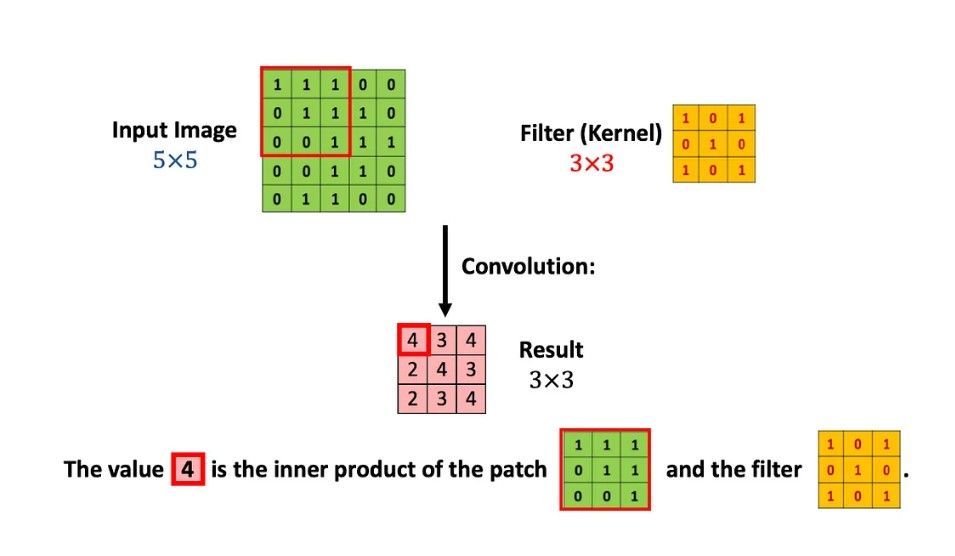

In [11]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/2025_Winter_딥러닝 Study/CNN_Transfer Learning/2D tensor patch_filter.jpg')

### 그림 설명 (Convolution 과 내적의 수학식으로)

(1+1+1+0+1+1+0+0+1) x (1+0+1+0+1+0+1+0+1) =

🟥 = 1 ⬜ = 0

| a\b | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 |
|----:|---|---|---|---|---|---|---|---|---|
| 1 | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 |
| 1 | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 |
| 1 | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 |
| 0 | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ |
| 1 | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 |
| 1 | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 |
| 0 | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ |
| 0 | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ | ⬜ |
| 1 | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 | ⬜ | 🟥 |


##  Inner Product (내적)의 정의

두 벡터가 다음과 같이 주어졌을 때

$$
\mathbf{a} = (a_1, a_2, \dots, a_n), \quad
\mathbf{b} = (b_1, b_2, \dots, b_n)
$$

내적(inner product)은 **같은 인덱스의 원소끼리만 곱한 뒤 모두 더한 값**으로 정의된다.

$$
\mathbf{a} \cdot \mathbf{b}
= \sum_{i=1}^{n} a_i b_i
$$

즉,

- 모든 조합을 계산하지 않는다  
- 오직 **\( i = j \)** 인 경우만 사용한다  
- 결과는 **스칼라 값 1개**이다


## Diagonal Visualization in the Heatmap

Heatmap을 행렬로 시각화하면,  
내적에 기여하는 항들은 **주대각선(diagonal)** 상에 위치한다.

```text
🟥 ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ 🟥 ⬜ ⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ 🟥 ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜
⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ ⬜ 🟥



In [12]:
import numpy as np

# 1. 입력 이미지 정의 (5x5)
input_image = np.array([
    [1, 1, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 1, 1],
    [0, 0, 1, 1, 0],
    [0, 1, 1, 0, 0]
])

# 2. 필터(커널) 정의 (3x3)
kernel = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

# 3. 그림에 표시된 첫 번째 패치 추출 (0,0 위치부터 3x3 크기)
# input[i-1:i+1, j-1:j+1] 형태의 슬라이싱과 유사함
patch = input_image[0:3, 0:3]

# 4. 내적 연산을 위해 1차원 벡터로 변환 (Flatten)
# "Each such 3D patch is then transformed into a 1D vector"
patch_flat = patch.flatten()
kernel_flat = kernel.flatten()

# 5. 내적(Dot Product) 수행
result = np.dot(patch_flat, kernel_flat)

print("--- 추출된 패치 ---")
print(patch)
print("--- 추출된 커널 ---")
print(kernel)
print("\n--- 일렬로 펼친 벡터 ---")
print(f"패치 벡터: {patch_flat}")
print(f"커널 벡터: {kernel_flat}")
print("\n--- 결과 ---")
print(f"내적 결과값: {result}")

--- 추출된 패치 ---
[[1 1 1]
 [0 1 1]
 [0 0 1]]
--- 추출된 커널 ---
[[1 0 1]
 [0 1 0]
 [1 0 1]]

--- 일렬로 펼친 벡터 ---
패치 벡터: [1 1 1 0 1 1 0 0 1]
커널 벡터: [1 0 1 0 1 0 1 0 1]

--- 결과 ---
내적 결과값: 4


## **2. Tensor 3 (Channel 3) Image Data**
- 아래그람은 입력데이터의 채널의 개수만큼 서로 다른 3개 Filter를 컨볼루션하고 합산하는 시각화이며 코드로 구현
- 이 의미는?
- 해상도가 높은(픽셀의 수가 많은 수평적인)데이터를 픽셀의 수가 극히 적게 conv+poolig을 반복하여 (수평적인 데입력데이터를 아주 적은 해상도로 축소하되 수직적 깊이인 특성을 계속 추가) 모델아키텍쳐를 구성하고 Loss를 최소화하는 filter의 parameter를 찾는 딥러닝 작동방식
<div style="display:flex; gap:10px;">

  <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Boz5FkpCxJyHj5mdNrbTTA.gif" width="400" height="300">
  <img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Q7NXeOlDkm4xlNrNQOS67g.gif" width="400" height="300">

</div>

In [13]:
import numpy as np

# 1. 3D 패치 정의 (3x3x3 - RGB 각 채널별 데이터)
# 3D 데이터에서 특정 영역만 추출
# 각 채널(R, G, B)은 3x3 행렬입니다.
patch_r = np.array([[1, 1, 1], [0, 1, 1], [0, 0, 1]]) # Channel 0
patch_g = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) # Channel 1
patch_b = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]) # Channel 2

# 전체 3D 패치 결합 (Shape: 3, 3, 3)
patch_3d = np.stack([patch_r, patch_g, patch_b], axis=-1)

# 2. 3D 커널 정의 (각 채널에 대응하는 가중치)
kernel_r = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
kernel_g = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
kernel_b = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

kernel_3d = np.stack([kernel_r, kernel_g, kernel_b], axis=-1)

# 3. 1차원 벡터로 변환 (Flatten) - 텍스트 설명의 "transformed into a 1D vector" 단계
patch_flat = patch_3d.flatten()
kernel_flat = kernel_3d.flatten()

# 4. 내적 연산 (Dot Product)
# sum(patch_flat * kernel_flat) 와 동일
dot_product_result = np.dot(patch_flat, kernel_flat)

print("--- 3D 패치 벡터 (27개 요소) ---")
print(patch_flat)
print("\n--- 3D 커널 벡터 (27개 요소) ---")
print(kernel_flat)
print("\n--- 결과 ---")
print(f"최종 내적 결과값: {dot_product_result}")

--- 3D 패치 벡터 (27개 요소) ---
[1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0]

--- 3D 커널 벡터 (27개 요소) ---
[1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1]

--- 결과 ---
최종 내적 결과값: 9


## 3D 패치 및 커널 정의 (입력과 가중치)

이미지는 보통 가로(width), 세로(height)뿐만 아니라 채널(Channel: R, G, B)이라는 깊이(Depth)를 가진다.

$$
\text{총 데이터 수} = 3 \times 3 \times 3 = 27
$$

### 🔹 Kernel (필터)
- 입력 데이터의 특징을 추출하기 위한 **가중치 묶음**
- 입력 채널 수에 맞추어 **동일하게 3개 층(R, G, B)**으로 구성됨
- 각 채널마다 하나의 $$3 \times 3\$$ 가중치 행렬을 가짐

---


## 3️⃣ 내적 연산 (Dot Product)

합성곱(convolution)의 핵심 연산은 같은 위치에 있는 값끼리 곱한 뒤 모두 더하는 과정이다.

3차원 패치와 3차원 커널을 flatten하면 각각 길이 \( n = 27 \)인 1차원 벡터가 된다.

내적 연산은 다음과 같이 표현된다.

$$
\text{Result}
= \sum_{i=1}^{n} (\text{Patch}_i \times \text{Kernel}_i)
$$

이는 flatten된 patch 벡터와 kernel 벡터의  **inner product (내적)** 에 해당한다.

---

## 4️⃣ 채널별 실제 계산 결과

Flatten 이전의 구조를 기준으로 보면, 내적은 **채널별 합성곱 결과의 합**과 동일하다.

### 🔴 R 채널

패치와 커널의 같은 위치 값을 곱해 모두 더하면 다음과 같다.

$$
\text{R 채널 결과} = 4
$$

### 🟢 G 채널

서로 겹치는 값이 없어 기여 항이 존재하지 않는다.

$$
\text{G 채널 결과} = 0
$$

### 🔵 B 채널

패치에서 1이 5개이고, 커널 값이 모두 1이므로 그대로 합산된다.

$$
\text{B 채널 결과} = 5
$$

---

## 5️⃣ 최종 합성곱 결과

각 채널의 결과를 모두 더하면  
단일 출력 값(feature value)이 된다.

$$
\text{Final Result}
= 4 + 0 + 5
= \boxed{9}
$$


## **합성곱(Convolution) vs 어텐션(Attention) 핵심 요약**

### 1. 한눈에 보는 차이
- **합성곱(CNN)**  
  - 국소적(Local) 영역만 연결  
  - 강한 귀납적 편향(Inductive Bias) 보유  
  - 이미지의 질감·에지·패턴 추출에 강점  
  - 장거리 의존성 학습에 한계

- **어텐션(Transformer)**  
  - 모든 위치 간 전역(Global) 상호작용  
  - 귀납적 편향이 약함  
  - 장거리 의존성 학습에 탁월  
  - 국소 특징 학습에는 계산량 부담

---

### 2. 이론적 관계: 어텐션은 합성곱의 확장
- 합성곱 = **국소 영역으로 제한된 어텐션**
  - 커널 밖 가중치는 0으로 고정
- 어텐션 = **가중치가 자유로운 전역 합성**
- 연구 결과
  - 멀티헤드 어텐션은 충분한 조건에서 **모든 합성곱 연산을 모사 가능**
  - (Cordonnier et al., Google Research, 2019)

---

### 3. 상호 보완적 발전 (Hybrid 구조)
- **CNN의 한계**
  - 깊은 층이 필요 → 장거리 의존성 비효율
- **Attention의 한계**
  - 국소 특징에 과도한 계산
- **최근 트렌드**
  - **ViT**: 패치 단위 어텐션으로 CNN 없이 비전 처리
  - **Hybrid 모델**
    - 초기: CNN → 저수준 특징
    - 상위: Attention → 전역 맥락
    - 예: Conformer, BoTNet

---

### 4. 어텐션이 각광받는 이유
- 데이터 적음 → CNN 유리 (강한 귀납적 편향)
- 데이터 많음 → Attention 유리 (표현력 극대화)
- 대규모 데이터 환경에서
  - 복잡한 패턴을 스스로 학습
  - LLM·최신 비전 모델의 표준 구조로 자리 잡음

---

### 5. 핵심 한 줄 정리
- **CNN은 “잘 설계된 국소 규칙”, Attention은 “학습 가능한 전역 규칙”**
- 현재 딥러닝의 방향은 **둘의 결합과 상황별 최적 활용**
